<a href="https://colab.research.google.com/github/imaleaf03/bigdata-real_estate-model/blob/main/USA_Real_Estate_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = '/content/realtor-data.zip.csv'
df = pd.read_csv(file_path)

# Print basic info
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2226382, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [2]:
# Check data types and nulls
print(df.info())

# Summary statistics
print(df.describe())

# Check missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing)

# Check unique states
print("Unique States:", df['state'].nunique())
print("States List:\n", df['state'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
None
        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.6500

In [3]:
df['status'].unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

In [4]:
# Convert zip_code and street to string (categorical)
# df['zip_code'] = df['zip_code'].astype(str) # Remove this line
df['street'] = df['street'].astype(str)

# Drop rows with missing critical data or invalid zero values
df = df.dropna(subset=['price', 'house_size', 'zip_code', 'state'])
#df = df[(df['price'] > 0) & (df['bed'] > 0) & (df['bath'] > 0)]

# Drop irrelevant or too-missing columns (optional)
#df.drop(columns=['brokered_by', 'prev_sold_date'], inplace=True)

# Convert house_size, acre_lot to numeric (again for safety)
df['house_size'] = pd.to_numeric(df['house_size'], errors='coerce')
df['acre_lot'] = pd.to_numeric(df['acre_lot'], errors='coerce')

# Convert zip_code to numeric, then to integer, handling NaNs
df['zip_code'] = pd.to_numeric(df['zip_code'], errors='coerce')
df.dropna(subset=['zip_code'], inplace=True) # Drop rows where zip_code became NaN after numeric conversion
df['zip_code'] = df['zip_code'].astype(int) # Convert to integer

# Final check
print("New shape after cleaning:", df.shape)
print(df.isnull().sum())

New shape after cleaning: (1656849, 12)
brokered_by         2679
status                 0
price                  0
bed                20309
bath               44068
acre_lot          275594
street                 0
city                 319
state                  0
zip_code               0
house_size             0
prev_sold_date    388092
dtype: int64


In [5]:
'''# Drop missing city rows
df = df[df['city'].notnull()]

# Fill acre_lot missing with median
df['acre_lot'].fillna(df['acre_lot'].median(), inplace=True)

# Fill house_size missing with median
df['house_size'].fillna(df['house_size'].median(), inplace=True)
'''

"# Drop missing city rows\ndf = df[df['city'].notnull()]\n\n# Fill acre_lot missing with median\ndf['acre_lot'].fillna(df['acre_lot'].median(), inplace=True)\n\n# Fill house_size missing with median\ndf['house_size'].fillna(df['house_size'].median(), inplace=True)\n"

# VISUALIZE

## **1. Average Property Price by State**

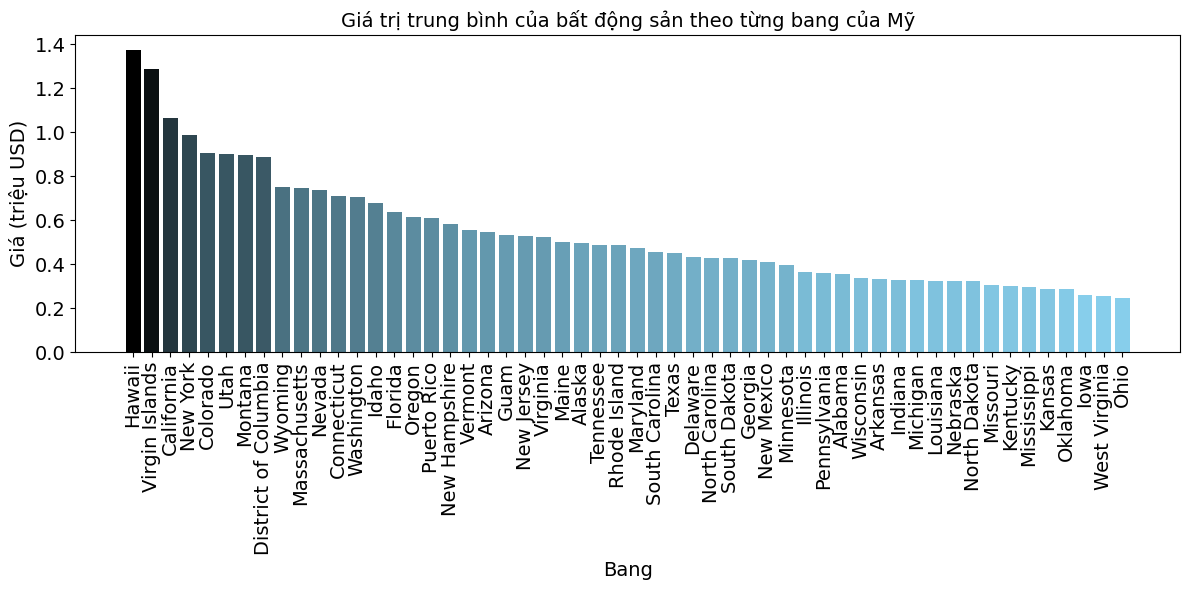

In [6]:
from matplotlib.colors import LinearSegmentedColormap

# Step 1: Calculate average price per state
avg_price_state = df.groupby('state')['price'].mean().sort_values(ascending=False)/1e6

# Step 2: Create a custom colormap from skyblue to black
colorscale = LinearSegmentedColormap.from_list("skyblue_black", ["skyblue", "black"], N=len(avg_price_state))

# Step 3: Normalize the data to assign gradient colors
normalized = (avg_price_state - avg_price_state.min()) / (avg_price_state.max() - avg_price_state.min())
bar_colors = [colorscale(val) for val in normalized]

# Step 4: Plot with custom colors
plt.figure(figsize=(12,6))
plt.bar(avg_price_state.index, avg_price_state.values, color=bar_colors)
plt.title('Giá trị trung bình của bất động sản theo từng bang của Mỹ', fontsize=14) # Increased title font size
plt.ylabel('Giá (triệu USD)', fontsize=14) # Increased ylabel font size
plt.xlabel('Bang', fontsize=14) # Increased xlabel font size
plt.xticks(rotation=90, fontsize=14) # Increased xticks font size
plt.yticks(fontsize=14) # Increased yticks font size
plt.tight_layout()
plt.show()

## **2. Top 10 Cities with Highest Mean Price**

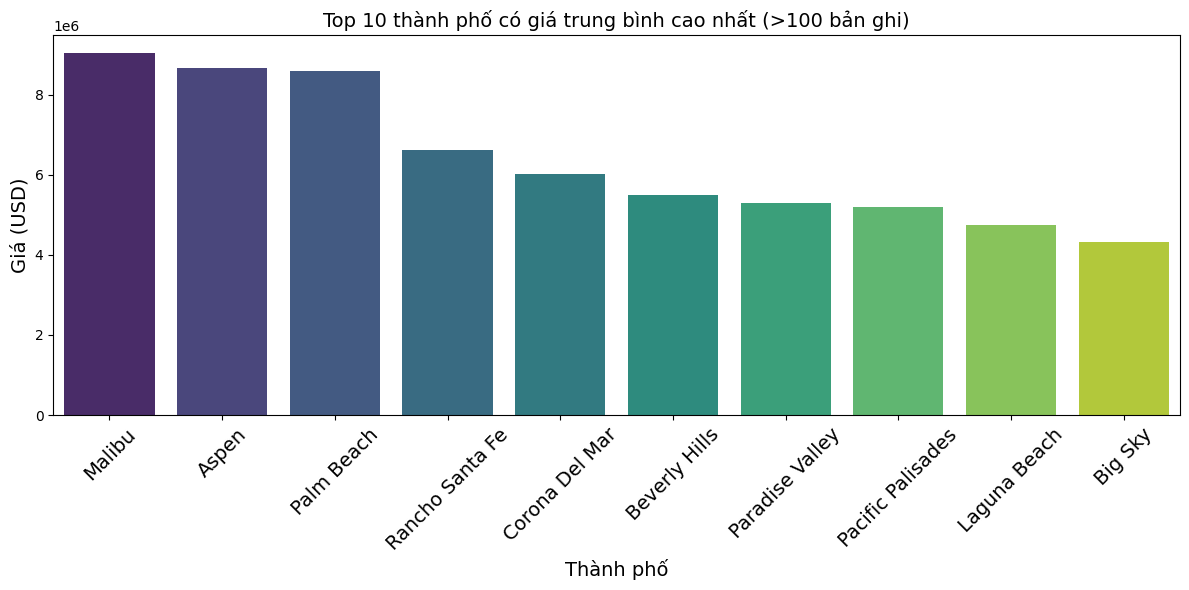

city
Malibu               9.027148e+06
Aspen                8.654388e+06
Palm Beach           8.576009e+06
Rancho Santa Fe      6.617403e+06
Corona Del Mar       6.026433e+06
Beverly Hills        5.489362e+06
Paradise Valley      5.302005e+06
Pacific Palisades    5.195540e+06
Laguna Beach         4.737982e+06
Big Sky              4.310342e+06
Name: price, dtype: float64


In [7]:
# Step 1: Filter only cities with more than 100 listings
city_counts = df['city'].value_counts()
valid_cities = city_counts[city_counts > 100].index
df_valid = df[df['city'].isin(valid_cities)]

# Step 2: Now calculate top 10 cities with highest median price (from valid ones)
top_cities_cleaned = df_valid.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

# Step 3: Plot again
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities_cleaned.index, y=top_cities_cleaned.values, palette='viridis')
plt.title('Top 10 thành phố có giá trung bình cao nhất (>100 bản ghi)', fontsize=14)
plt.ylabel('Giá (USD)', fontsize=14)
plt.xlabel('Thành phố', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

# Optionally, show the city names and prices
print(top_cities_cleaned)


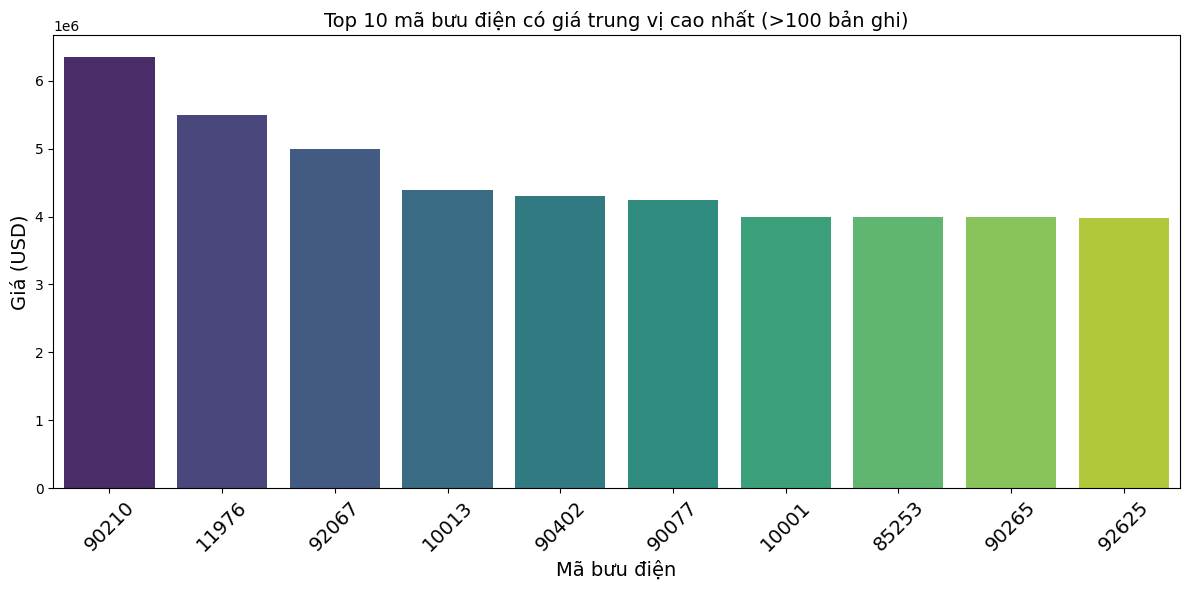

zip_code
90210    6350000.0
11976    5495000.0
92067    4997444.0
10013    4395000.0
90402    4300000.0
90077    4250000.0
10001    4000000.0
85253    3999000.0
90265    3995000.0
92625    3985000.0
Name: price, dtype: float64


In [8]:
# Step 1: Filter only cities with more than 100 listings
zip_code_counts = df['zip_code'].value_counts()
valid_cities = zip_code_counts[zip_code_counts > 100].index
df_valid = df[df['zip_code'].isin(valid_cities)]

# Remove rows where zip_code is 'nan' # This line is no longer needed as 'nan' values are handled in data cleaning
# df_valid = df_valid[df_valid['zip_code'] != 'nan']

# Step 2: Now calculate top 10 cities with highest median price (from valid ones)
top_cities_cleaned = df_valid.groupby('zip_code')['price'].median().sort_values(ascending=False).head(10)

# Step 3: Plot again
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities_cleaned.index.astype(str), y=top_cities_cleaned.values, palette='viridis') # Convert index to string for plotting
plt.title('Top 10 mã bưu điện có giá trung vị cao nhất (>100 bản ghi)', fontsize=14)
plt.ylabel('Giá (USD)', fontsize=14)
plt.xlabel('Mã bưu điện', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.tight_layout()
plt.show()

# Optionally, show the zip_code names and prices
print(top_cities_cleaned)

## **3. Distribution of House Sizes**

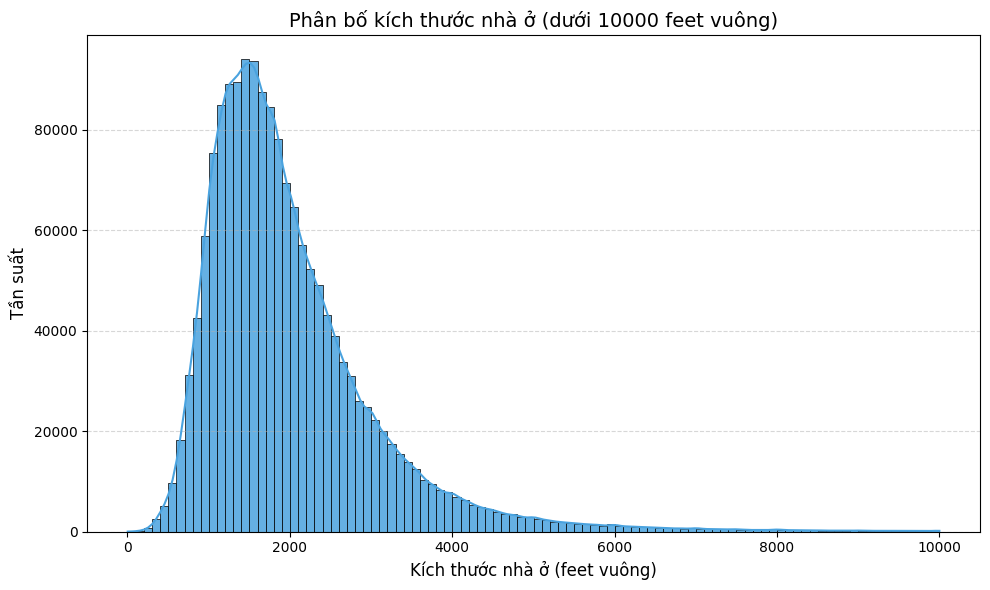

In [11]:
# Only work with houses under 10,000 sqft
filtered = df[df['house_size'] <= 10000]

plt.figure(figsize=(10,6))
sns.histplot(
    filtered['house_size'],
    bins=100,
    kde=True,
    color='#4aa3df',  # Attractive Sky Blue (slightly deeper)
    edgecolor='black',
    alpha=0.85
)
plt.title('Phân bố kích thước nhà ở (dưới 10000 feet vuông)', fontsize=14)
plt.xlabel('Kích thước nhà ở (feet vuông)', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

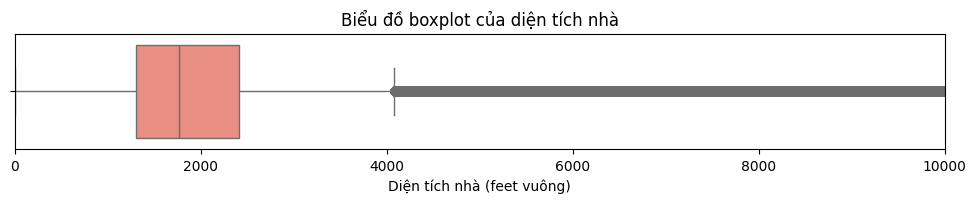

In [29]:
plt.figure(figsize=(12, 1.5))
sns.boxplot(x=df['house_size'], color='salmon')
plt.title('Biểu đồ boxplot của diện tích nhà')
plt.xlabel('Diện tích nhà (feet vuông)')
plt.xlim(0, 10000)
plt.show()


## **4. Price vs. Number of Beds**

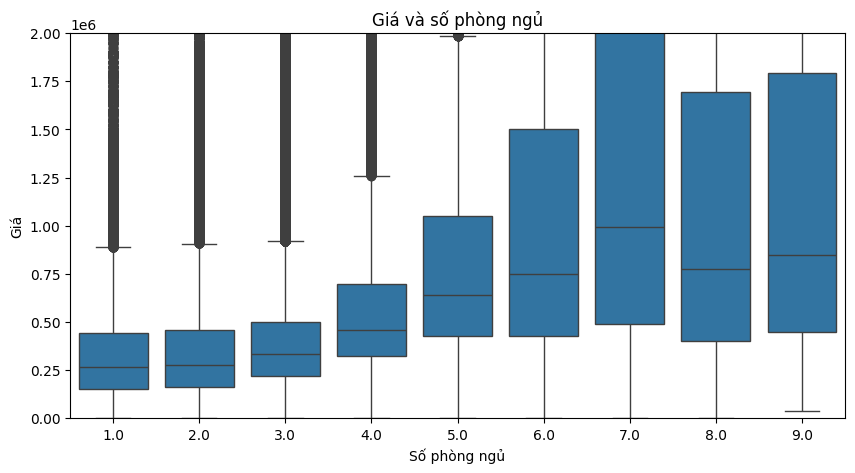

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['bed'] < 10], x='bed', y='price')
plt.ylim(0, 2_000_000)
plt.title('Giá và số phòng ngủ')
plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá')
plt.show()


## **5. Price vs. Number of Baths**

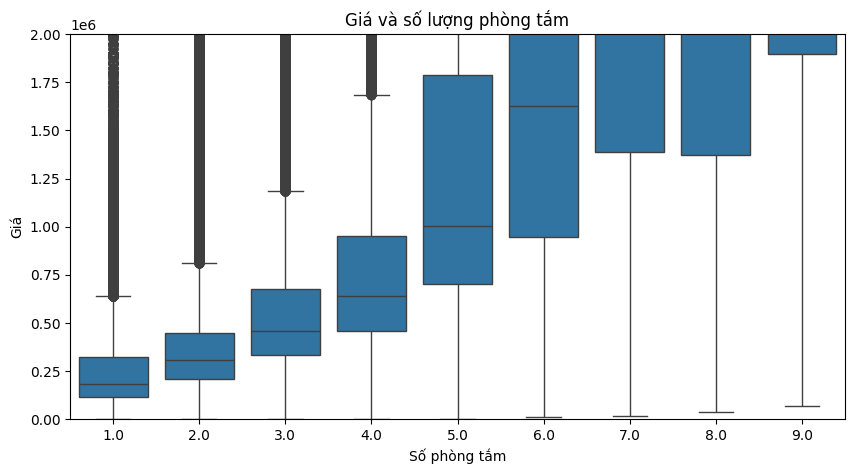

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['bath'] < 10], x='bath', y='price')
plt.ylim(0, 2_000_000)
plt.title('Giá và số lượng phòng tắm')
plt.xlabel('Số phòng tắm')
plt.ylabel('Giá')
plt.show()


## **6. Price vs. Acre Lot Size**

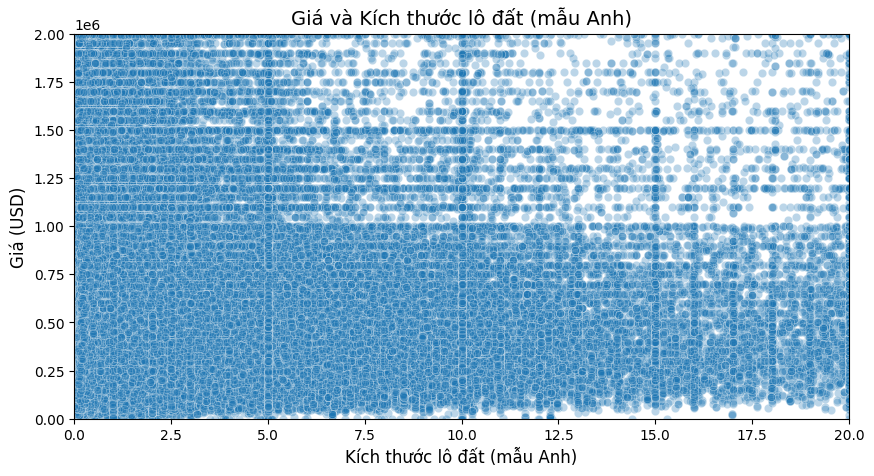

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='acre_lot', y='price', data=df, alpha=0.3)
plt.xlim(0, 20)
plt.ylim(0, 2_000_000)
plt.title('Giá và Kích thước lô đất (mẫu Anh)', fontsize=14)
plt.xlabel('Kích thước lô đất (mẫu Anh)', fontsize=12)
plt.ylabel('Giá (USD)', fontsize=12)
plt.show()

## **7. Correlation Heatmap of Numerical Columns**

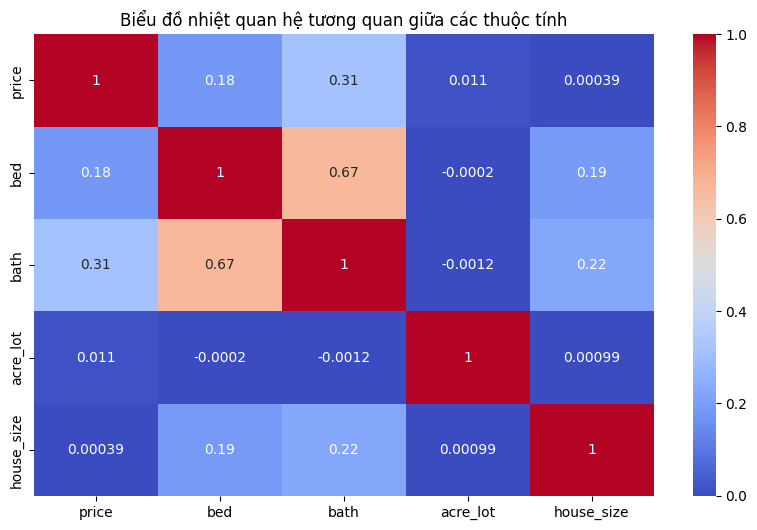

In [26]:
plt.figure(figsize=(10,6))
num_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Biểu đồ nhiệt quan hệ tương quan giữa các thuộc tính')
plt.show()


## **8. Most Common Zip Codes by Listings**

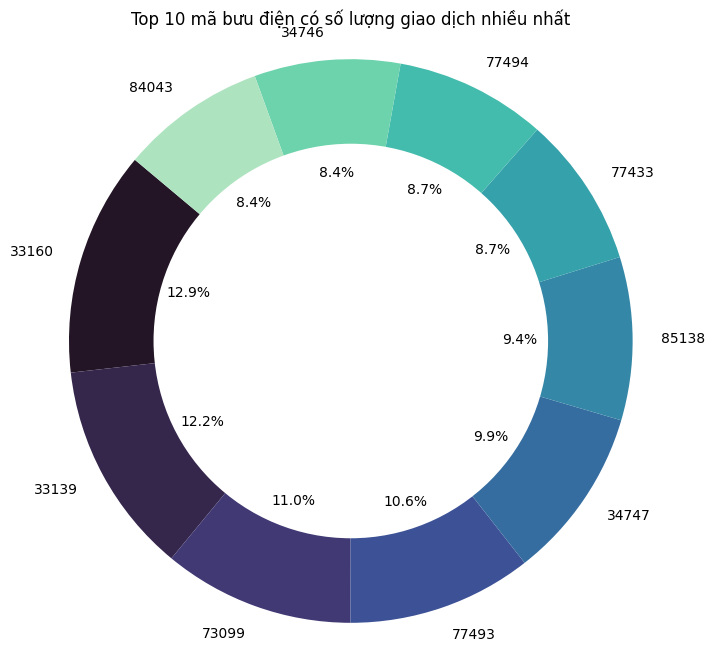

In [25]:
top_zip = df['zip_code'].value_counts().head(10)

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(top_zip.values, labels=top_zip.index.astype(str), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('mako', 10))
# Draw center circle to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Top 10 mã bưu điện có số lượng giao dịch nhiều nhất')
plt.axis('equal')
plt.show()


## **9. State-wise Price Range Categories**

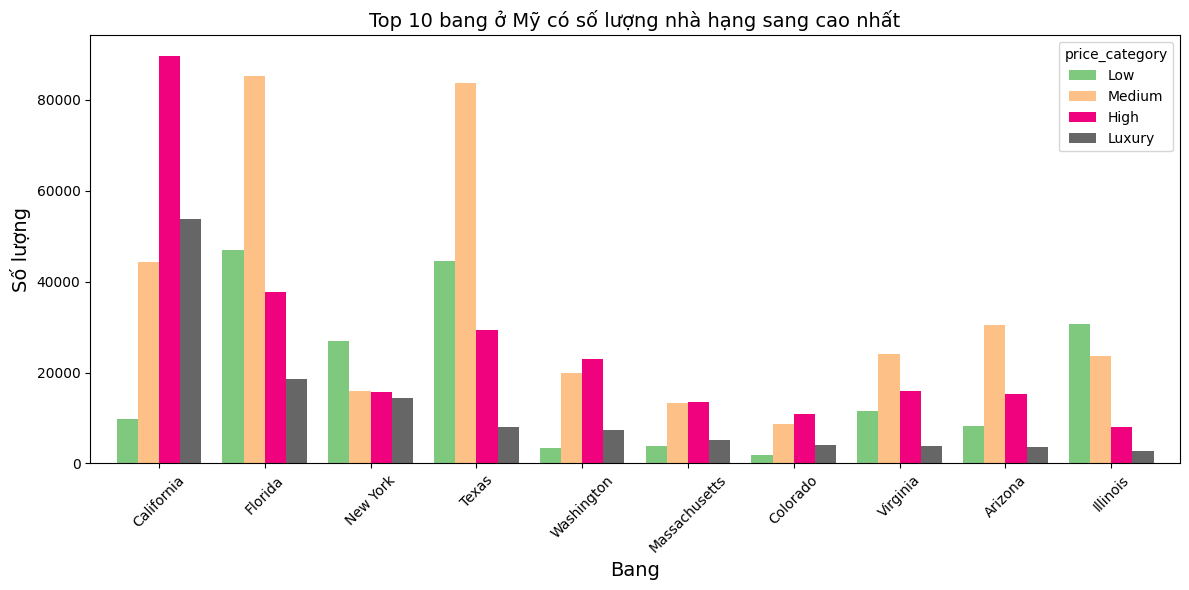

In [18]:
# Create price bins
df['price_category'] = pd.cut(df['price'], bins=[0, 250000, 500000, 1000000, float('inf')],
                              labels=['Low', 'Medium', 'High', 'Luxury'])

state_price_cat = df.groupby(['state', 'price_category']).size().unstack().fillna(0)

# Plot grouped bar chart (instead of stacked)
state_price_cat.sort_values(by='Luxury', ascending=False).head(10).plot(
    kind='bar', figsize=(12,6), colormap='Accent', width=0.8)

plt.title('Top 10 bang ở Mỹ có số lượng nhà hạng sang cao nhất', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xlabel('Bang', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **10. Boxplot: Price Distribution by State (Top 10 States)**

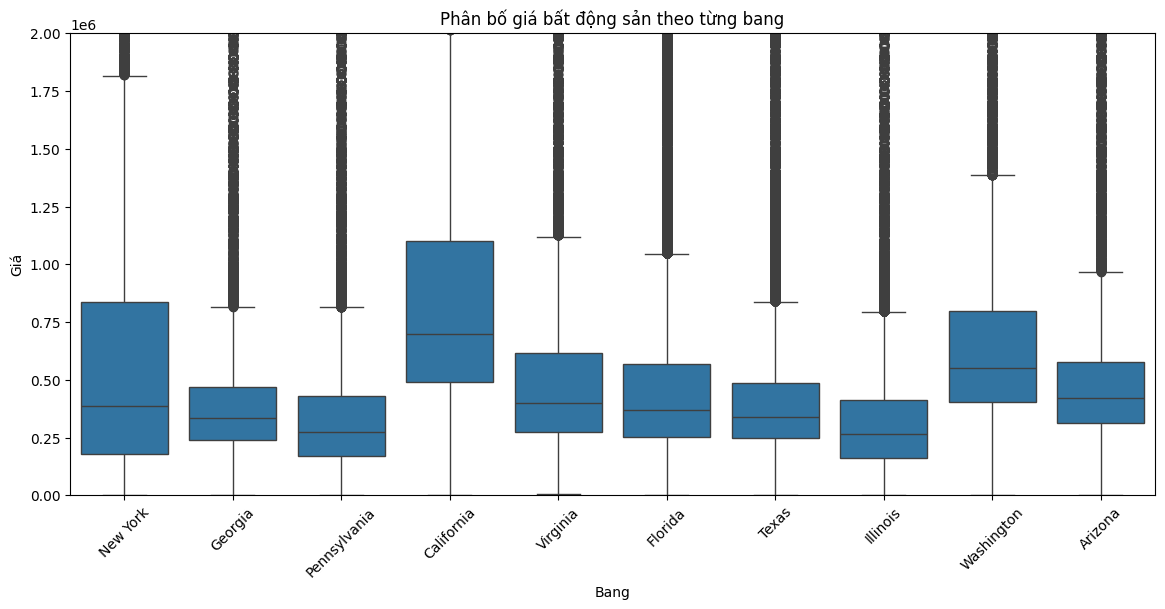

In [30]:
top_states = df['state'].value_counts().head(10).index
df_top_states = df[df['state'].isin(top_states)]

plt.figure(figsize=(14,6))
sns.boxplot(x='state', y='price', data=df_top_states)
plt.ylim(0, 2_000_000)
plt.title('Phân bố giá bất động sản theo từng bang')
plt.ylabel('Giá')
plt.xlabel('Bang')
plt.xticks(rotation=45)
plt.show()


# **Feature Engineering**

## **11. Price per Square Foot**

In [20]:
# Avoid division by zero
df['price_per_sqft'] = df['price'] / df['house_size']


## **12. Is_Luxury_Home**

In [21]:
df['is_luxury_home'] = df['price'].apply(lambda x: 1 if x > 1_000_000 else 0)


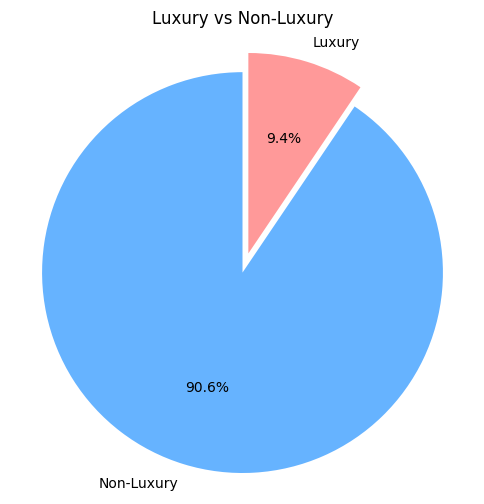

In [31]:
# Count the values
luxury_counts = df['is_luxury_home'].value_counts()

# Labels
labels = ['Non-Luxury', 'Luxury']

# Colors (optional)
colors = ['#66b3ff','#ff9999']

# Plot
plt.figure(figsize=(6,6))
plt.pie(luxury_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.1))
plt.title('Luxury vs Non-Luxury')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


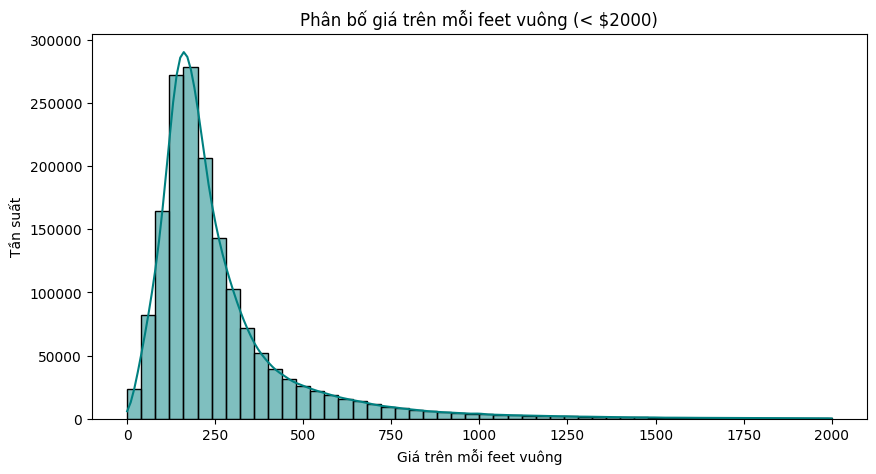

In [32]:
# Filter out extreme outliers (e.g., > $2000 per sqft)
filtered_df = df[df['price_per_sqft'] < 2000]

plt.figure(figsize=(10,5))
sns.histplot(filtered_df['price_per_sqft'], bins=50, kde=True, color='teal')
plt.title("Phân bố giá trên mỗi feet vuông (< $2000)")
plt.xlabel("Giá trên mỗi feet vuông")
plt.ylabel("Tần suất")
plt.show()


## **13. Average Price per Sqft by Top 10 Cities**

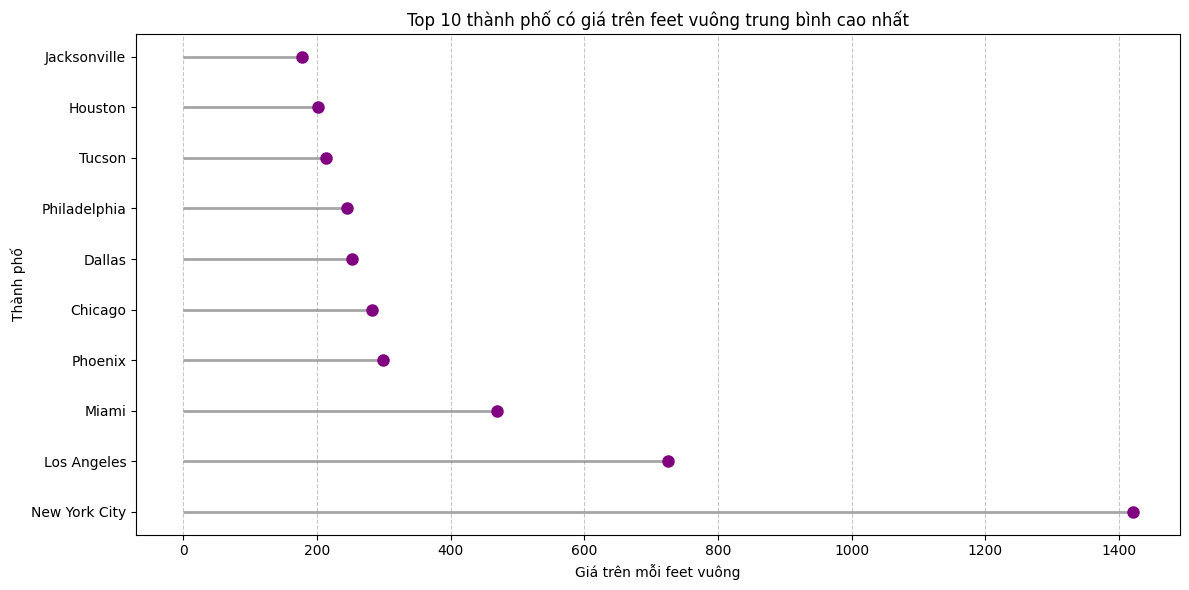

In [33]:
# Top 10 cities with most listings
top_cities = df['city'].value_counts().head(10).index

# Filter and group
avg_price_by_city = df[df['city'].isin(top_cities)].groupby('city')['price_per_sqft'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
cities = avg_price_by_city.index
prices = avg_price_by_city.values

# Draw the stems
plt.hlines(y=cities, xmin=0, xmax=prices, color='gray', alpha=0.7, linewidth=2)
# Draw the dots
plt.plot(prices, cities, "o", markersize=8, color='purple')

plt.title('Top 10 thành phố có giá trên feet vuông trung bình cao nhất')
plt.xlabel('Giá trên mỗi feet vuông')
plt.ylabel('Thành phố')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
